# T1 - Programacao Concorrente


# Objetivo
Implementar em C no Linux o programa CONTROLADOR, o qual deve incluir as seguintes funcionalidades de controle:

- Laço de controle como tarefa periódica para a temperatura;
- Uso do tanque auxiliar e da saída de água;
- Informações na tela sobre a situação corrente.

Outros requisitos:
- Não usar threads;
- Período do controlador de temperatura deve ser 30ms exato, ver exemplo;
- Atualização da tela pode ser aproximadamente a cada 1 segundo.

Adicionalmente:

- Número de amostras >= 10000.
- Usar como unidade microsegundo nos gráficos.
- Fazer a coleta dos dados em máquina real e não em máquina virtual.
- Gerar relatório em PDF com texto descrevendo as observações e os gráficos.

In [12]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [50]:
MICROSEC_PER_SEC = 1000000
response_times = pd.read_csv('response_times_20000.csv')
response_times.columns = ['response_times_ns']
response_times

,response_times_ns
0,6435254
1,12910546
2,2407914
3,5497734
4,3386385
...,...
19995,1776268
19996,1313721
19997,1463333
19998,1345539


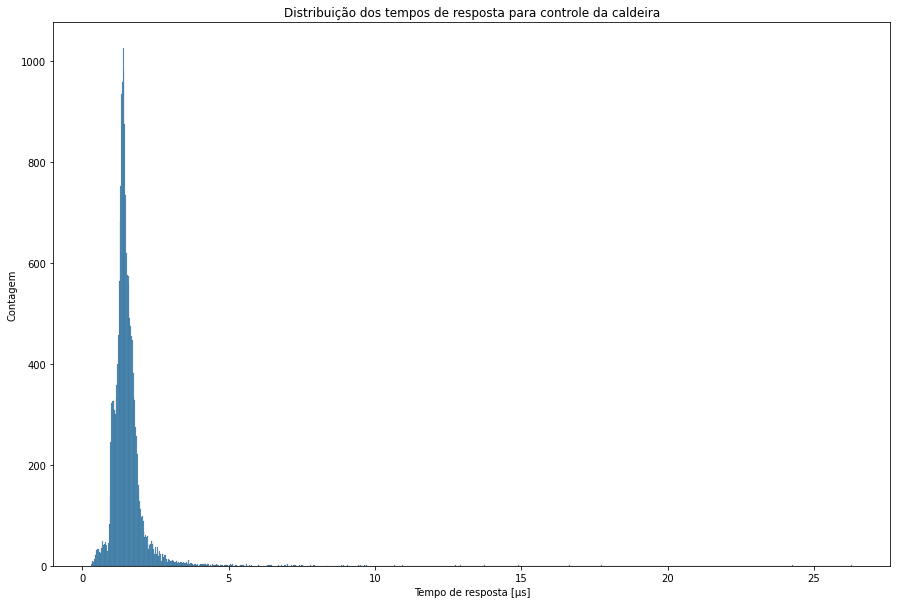

Numero de amostras: 20000
Media: 1.5322609378 μs
Mediana: 1.4430109999999998 μs
Desvio padrao: 0.6348227007513854 μs
Max: 26.305061 μs
Min: 0.316344 μs


In [64]:
rtmis = response_times.response_times_ns / MICROSEC_PER_SEC

sns_plot = plt.figure(figsize=(15, 10))
sns.histplot(rtmis)
plt.title('Distribuição dos tempos de resposta para controle da caldeira')
plt.ylabel('Contagem')
plt.xlabel('Tempo de resposta [μs]')
# sns_plot.savefig("response_time_distribution.png")
plt.show()

print(f'Numero de amostras: {response_times.shape[0]}')
print(f'Media: {rtmis.mean()} μs')
print(f'Mediana: {rtmis.median()} μs')
print(f'Desvio padrao: {rtmis.std()} μs')
print(f'Max: {rtmis.max()} μs')
print(f'Min: {rtmis.min()} μs')